<a href="https://colab.research.google.com/github/menotti/Deep-Learning-for-Beginners/blob/master/Aprendizado_Profundo_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo: Aprendizado Profundo para iniciantes ([Phil Kim, Deep Learning for Beginners](https://github.com/philbooks/Deep-Learning-for-Beginners))
* Ricardo Menotti <<menotti@ufscar.br>>; *com grande ajuda de* 
* Mauricio Figueiredo <<mauricio@ufscar.br>>

In [1]:
#@title Instalações e correções 
!apt install imagemagick pdf2svg texlive texlive-latex-extra &> /dev/null
!pip install git+https://github.com/mkrphys/ipython-tikzmagic.git &> /dev/null
!pip install schemdraw[matplotlib] &> /dev/null
%load_ext tikzmagic
import schemdraw
from schemdraw import flow
import schemdraw.elements as elm
import schemdraw.dsp as dsp

In [2]:
#@title
%%writefile /usr/local/lib/python3.9/dist-packages/schemdraw/dsp/dsp.patch
diff --git a/dsp/dsp.py b/dsp/dsp.py
index a097cd0..8424cc8 100644
--- a/dsp/dsp.py
+++ b/dsp/dsp.py
@@ -67,8 +67,8 @@ class Circle(Element):
         self.anchors['W'] = (0, 0)
         self.anchors['NW'] = (rad-k, k)
         self.anchors['NE'] = (rad+k, k)
-        self.anchors['SW'] = (rad-k, k)
-        self.anchors['SE'] = (rad+k, k)
+        self.anchors['SW'] = (rad-k, -k)
+        self.anchors['SE'] = (rad+k, -k)
         self.anchors['center'] = (rad, 0)
 
 

Writing /usr/local/lib/python3.9/dist-packages/schemdraw/dsp/dsp.patch


In [3]:
#@title
!cd /usr/local/lib/python3.9/dist-packages/schemdraw/ && git apply dsp/dsp.patch

error: patch failed: dsp/dsp.py:67
error: dsp/dsp.py: patch does not apply


# O que é Aprendizado Profundo (*Deep Learning*)?

**Aprendizado Profundo (*deep learning*)**  é um tipo de **Aprendizado de Máquina (*machine learning*)** que por sua vez é um campo da **Inteligência Artificial (*artificial intelligence*)**.

Concretamente, a técnica tem mais a ver com **aprender um modelo** a partir de um **conjunto de dados (*dataset*)** do que com inteligência propriamente dita. O aprendizado de máquina é útil em problemas onde é difícil obter regras ou equações para o problema. Por exemplo, pense no reconhecimento de caracteres escritos a mão. A distinção dos dados de treinamento para os dados de entrada é um desafio para o aprendizado de máquina. Suponha que um modelo tenha sido treinado para reconhecer os caracteres escritos por uma única pessoa. Você acha que ele seria capaz de reconhecer a letra de outra pessoa?

Não é possível para o Aprendizado de Máquina obter sucesso com dados de treinamento ruins ou **enviesados (*biased*)**, o mesmo se aplica ao Aprendizado Profundo. O processo usado para manter o desempenho do modelo consistente, independente dos dados de treinamento ou entrada, é chamado de **Generalização (*generalization*)** e dele depende o sucesso do Aprendizado de Máquina. 

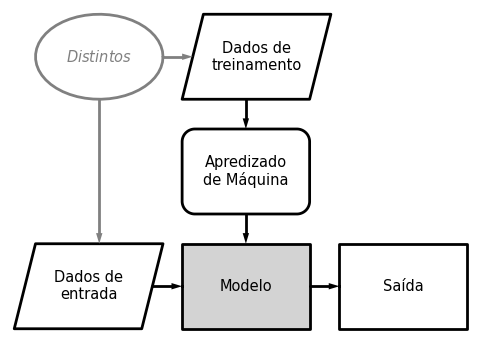

In [ ]:
#@title
with schemdraw.Drawing() as d:
    d.config(fontsize=12, unit=.7)
    d += (dis := flow.Ellipse().label('$Distintos$')).color('gray').drop('E')
    d += flow.Arrow().right().color('gray')
    d += (dados := flow.Data().label('Dados de\ntreinamento')).drop('S')
    d += flow.Arrow().down()
    d += flow.RoundProcess().label('Apredizado\nde Máquina').drop('S')
    d += flow.Arrow().down()
    d += (m := flow.Process().label('Modelo').drop('W')).fill('lightgray')
    d += flow.Arrow().left().reverse()
    d += (inp := flow.Data().label('Dados de\nentrada'))
    d += flow.Arrow().right().at(m.E)
    d += flow.Process().label('Saída')
    d += flow.Arrow().color('gray').at(dis.S).down().to(inp.N)

Uma das principais causas de corrupção do processo de generalização é chamado de **Sobreajuste (*overfitting*)**. Considere o problema de classificação da figura a seguir em dois grupos. Embora encontre alguns elementos discrepantes (*outliers*), o treinamento que resulta na curva da imagem central é o mais adequado. Se tentarmos reduzir demais o erro no conjunto de treinamento, podemos obter o modelo da figura da direita, que obviamente não terá bom desempenho com outra entrada.

<a href="https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/">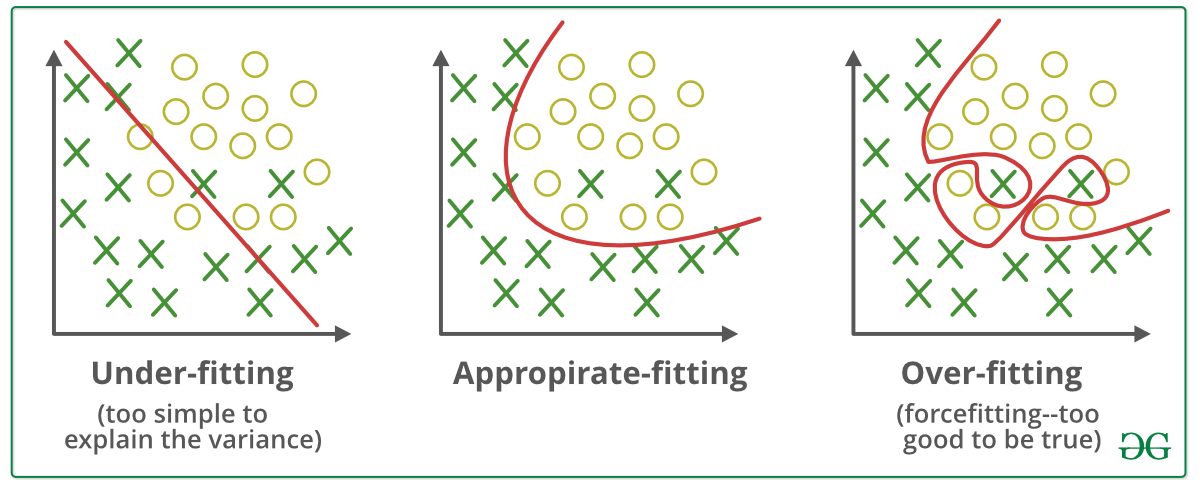</a>
Duas estratégias podem ser usadas para evitar o *overfitting*:

1. **Regularização (*regularization*):** consiste em obter o modelo mais simples possível. No problema de classificação anterior, podemos notar que a curva central - mais simples - funciona melhor, embore falhe em alguns casos. No entanto, em muitas situações, não será possível desenhar o modelo e avaliar facilmente. 
2. **Validação (*validation*):** consiste em dividir os dados de treinamento em duas partes, separando uma porção dele (*validation set*) para validar o modelo que foi treinado com o restante (*training set*). O conjunto de dados de validação não é usado no treinamento. 



## Tipos de Aprendizado de Máquina<a name="tipos"></a>

Muitas técnicas de aprendizado de máquina foram desenvolvidas para
resolver problemas em vários campos. Elas podem ser classificados em três tipos, dependendo do método de treinamento:

- Aprendizado supervisionado
- Aprendizado não-supervisionado
- Aprendizado por reforço

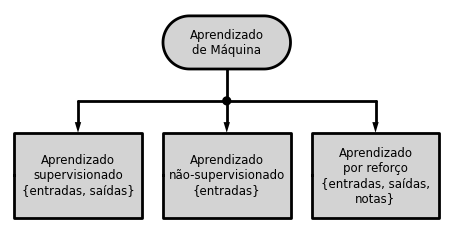

In [ ]:
#@title
with schemdraw.Drawing() as d:
    d.config(fontsize=10, unit=.75)
    d += flow.Terminal().label('Aprendizado\nde Máquina').fill('lightgray')
    d += flow.Line().dot()
    d.push()
    d.push()
    d += flow.Arrow()
    d += flow.Process().label('Aprendizado\nnão-supervisionado\n{entradas}').fill('lightgray')
    d.pop()
    d += flow.Wire().left().delta(3.5,0)
    d += flow.Arrow().down()
    d += flow.Process().label('Aprendizado\nsupervisionado\n{entradas, saídas}').fill('lightgray')
    d.pop()
    d += flow.Wire().right().delta(3.5,0)
    d += flow.Arrow().down()
    d += flow.Process().label('Aprendizado\npor reforço\n{entradas, saídas,\nnotas}').fill('lightgray')

O **aprendizado supervisionado** é similar ao aprendizado humano. Imagine como podemos aprender algum tópico resolvendo exercícios sobre o assunto. Nós aplicamos o conhecimento atual para resolver o exercício, verificamos a resposta e modificamos o conhecimento se ela estiver errada. 

No **aprendizado não supervisionado** temos apenas os problemas mas não sabemos as respostas corretas. Ele é usado para investigar as características dos dados ou pré-processá-los. É como se um estudante separasse vários problemas por assunto, mas que não saiba resolver nenhum deles. 

O **aprendizado por reforço** emprega dados de entrada, uma saída e uma nota como dados treinamento. Geralmente é usado quando é necessária uma interação ideal, como em problemas de controle e jogos.

Classificação e Regressão são os tipos mais comuns de aprendizado supervisionado. Na **classificação**, certamente a que tem mais aplicações, o problema é encontrar classes as quais os dados pertençam. Por exemplo, classificar certos e-mails como *spam*, reconhecer dígitos entre 0-9 em uma imagem ou reconhecer a face de uma pessoa entre usuários cadastrados. Os dados de treinamento, portanto, possuem a forma `{entrada, classe}`.

Usando nosso gráfico anterior, queremos um modelo que nos diga que a entrada na coordenada ($X$, $Y$) pertence a uma das classes ($\times$ ou $\circ$). Neste caso, o conjunto de dados de treinamento será algo como:

|Dados de treinamento|
|:---:|
|(classificação)|
|{$X_1$, $Y_1$, $\times$}|
|{$X_2$, $Y_2$, $\circ$}|
|$...$|
|{$X_2$, $Y_2$, $\times$}|

Já na **regressão**, não buscamos determinar uma classe, mas estimar um valor. Por exemplo, se você tem um conjunto de dados com idade e salário pode tentar obter um modelo que estima o salário a partir da idade. 

|Dados de treinamento|
|:---:|
|(regressão)|
|{$X_1$, $Y_1$}|
|{$X_2$, $Y_2$}|
|$...$|
|{$X_2$, $Y_2$}|



# Redes Neurais (*neural network*)

Um dos modelos mais conhecidos de aprendizado de máquina é o de Redes Neurais Artificias (que possuem este nome por imitar o cérebro humano). Neste modelo, o aprendizado possui uma regra e a rede neural é o modelo obtido após o treinamento.  

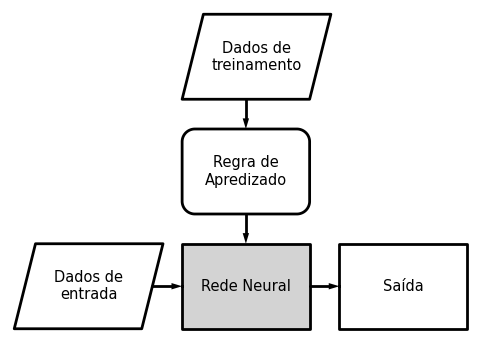

In [ ]:
#@title
with schemdraw.Drawing() as d:
    d.config(fontsize=12, unit=.7)
    d += (dados := flow.Data().label('Dados de\ntreinamento')).drop('S')
    d += flow.Arrow().down()
    d += flow.RoundProcess().label('Regra de\nApredizado').drop('S')
    d += flow.Arrow().down()
    d += (m := flow.Process().label('Rede Neural').drop('W')).fill('lightgray')
    d += flow.Arrow().left().reverse()
    d += (inp := flow.Data().label('Dados de\nentrada'))
    d += flow.Arrow().right().at(m.E)
    d += flow.Process().label('Saída')

## Nós de uma rede neural 

Nosso cérebro é composto por neurônios conectados entre si, as redes neurais artificias imitam este mecanismo com nós, cujas conexões possuem um peso associado a elas, onde está armazenado o conhecimento. Considere um nó que recebe três entradas ($X_1$, $X_2$ e $X_3$) e seus respectivos pesos ($W_1$, $W_2$ e $W_3$) além do viés (b) que é outro fator associado ao conhecimento da rede.

|Cérebro|Rede Neural|
|:------|-----------|
|Neurônios|Nós|
|Conexões|Pesos|

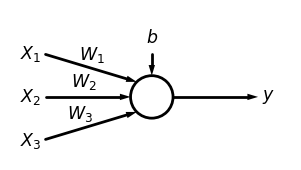

In [ ]:
#@title
%reload_ext autoreload
%autoreload 2
import schemdraw.dsp as dsp
with schemdraw.Drawing() as d:
    d.config(unit=2)
    d += elm.Arrow().label('$X_2$', loc='left')
    d += (c := dsp.Circle())
    d += elm.Arrow().label('$y$', loc='right')
    d += elm.Arrow().at((0, 1)).to(c.NW).label('$X_1$', loc='left')
    d += elm.Arrow().at((0,-1)).to(c.SW).label('$X_3$', loc='left')
    d += elm.Arrow().at((2.5, 1)).to(c.N)
    d += elm.lines.Label().at((2.4,1.5)).label('$b$')
    d += elm.lines.Label().at((1, 1.1)).label('$W_1$')
    d += elm.lines.Label().at((0.8, 0.45)).label('$W_2$')
    d += elm.lines.Label().at((0.7,-0.3)).label('$W_3$')

A soma ponderada do neurônio é calculada como:

$y = (w_1 \times x_1) + (w_2 \times x_2) + (w_3 \times x_3) + b$

Ela pode ser escrita na forma de matriz:

$y = wx + b$, 

onde $w$ e $x$ são definidos como: 

$w = \begin{bmatrix}w_1 & w_2 & w_3\\\end{bmatrix} ~~~~ x = \begin{bmatrix}x_1\\ x_2\\ x_3\\\end{bmatrix}$

Finalmente, o nó recebe a soma ponderada em sua função de ativação e emite a saída. A função de ativação determina o comportamento do nó:

$y = \varphi (wx + b)$

O tipo mais comum de redes neurais é aquele onde os nós estão organizados em camadas:

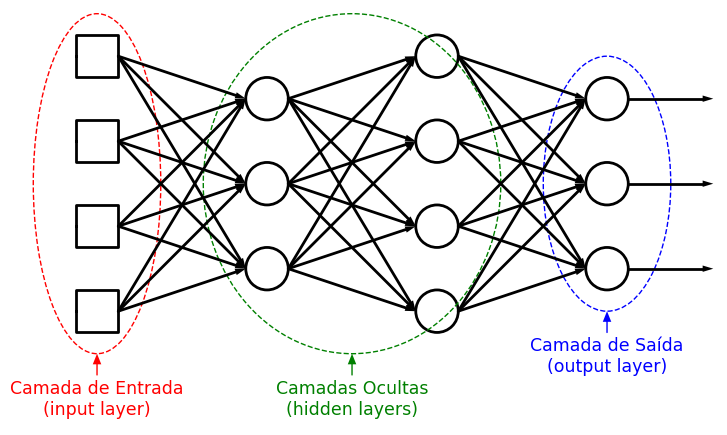

In [ ]:
#@title
%reload_ext autoreload
%autoreload 2
import schemdraw.dsp as dsp
with schemdraw.Drawing() as d:
    d.config(unit=2)
    d += (in1 := dsp.Square().at((0,0)))
    d += (in2 := dsp.Square().at((0,2)))
    d += (in3 := dsp.Square().at((0,4)))
    d += (in4 := dsp.Square().at((0,6)))

    d += (cin1 := dsp.Circle().at((4,1)))
    d += (cin2 := dsp.Circle().at((4,3)))
    d += (cin3 := dsp.Circle().at((4,5)))

    d += (cm1 := dsp.Circle().at((8,0)))
    d += (cm2 := dsp.Circle().at((8,2)))
    d += (cm3 := dsp.Circle().at((8,4)))
    d += (cm4 := dsp.Circle().at((8,6)))

    d += (cout1 := dsp.Circle().at((12,1)))
    d += (cout2 := dsp.Circle().at((12,3)))
    d += (cout3 := dsp.Circle().at((12,5)))

    d += elm.Arrow().at(cout1.E)
    d += elm.Arrow().at(cout2.E)
    d += elm.Arrow().at(cout3.E)

    d += elm.Arrow().at(in1.E).to(cin1.W)
    d += elm.Arrow().at(in1.E).to(cin2.W)
    d += elm.Arrow().at(in1.E).to(cin3.W)
    d += elm.Arrow().at(in2.E).to(cin1.W)
    d += elm.Arrow().at(in2.E).to(cin2.W)
    d += elm.Arrow().at(in2.E).to(cin3.W)
    d += elm.Arrow().at(in3.E).to(cin1.W)
    d += elm.Arrow().at(in3.E).to(cin2.W)
    d += elm.Arrow().at(in3.E).to(cin3.W)
    d += elm.Arrow().at(in4.E).to(cin1.W)
    d += elm.Arrow().at(in4.E).to(cin2.W)
    d += elm.Arrow().at(in4.E).to(cin3.W)

    d += elm.Arrow().at(cin1.E).to(cm1.W)
    d += elm.Arrow().at(cin1.E).to(cm2.W)
    d += elm.Arrow().at(cin1.E).to(cm3.W)
    d += elm.Arrow().at(cin1.E).to(cm4.W)
    d += elm.Arrow().at(cin2.E).to(cm1.W)
    d += elm.Arrow().at(cin2.E).to(cm2.W)
    d += elm.Arrow().at(cin2.E).to(cm3.W)
    d += elm.Arrow().at(cin2.E).to(cm4.W)
    d += elm.Arrow().at(cin3.E).to(cm1.W)
    d += elm.Arrow().at(cin3.E).to(cm2.W)
    d += elm.Arrow().at(cin3.E).to(cm3.W)
    d += elm.Arrow().at(cin3.E).to(cm4.W)

    d += elm.Arrow().at(cm1.E).to(cout1.W)
    d += elm.Arrow().at(cm1.E).to(cout2.W)
    d += elm.Arrow().at(cm1.E).to(cout3.W)
    d += elm.Arrow().at(cm2.E).to(cout1.W)
    d += elm.Arrow().at(cm2.E).to(cout2.W)
    d += elm.Arrow().at(cm2.E).to(cout3.W)
    d += elm.Arrow().at(cm3.E).to(cout1.W)
    d += elm.Arrow().at(cm3.E).to(cout2.W)
    d += elm.Arrow().at(cm3.E).to(cout3.W)
    d += elm.Arrow().at(cm4.E).to(cout1.W)
    d += elm.Arrow().at(cm4.E).to(cout2.W)
    d += elm.Arrow().at(cm4.E).to(cout3.W)

    d+= (input := elm.Encircle([in1, in2, in3, in4], padx=1, pady=0.5)).linestyle('--').linewidth(1).color('red')
    d+= elm.Annotate().at(input.S).label('Camada de Entrada\n(input layer)').delta(dx=0, dy=-0.5).linewidth(1).color('red')

    d+= (hidden := elm.Encircle([cin1, cin2, cin3, cm1, cm2, cm3, cm4], padx=1, pady=0.5)).linestyle('--').linewidth(1).color('green')
    d+= elm.Annotate().at(hidden.S).label('Camadas Ocultas\n(hidden layers)').delta(dx=0, dy=-0.5).linewidth(1).color('green')

    d+= (output := elm.Encircle([cout1, cout2, cout3], padx=1, pady=0.5)).linestyle('--').linewidth(1).color('blue')
    d+= elm.Annotate().at(output.S).label('Camada de Saída\n(output layer)').delta(dx=0, dy=-0.5).linewidth(1).color('blue')

Os nós da camada de entrada não calculam a soma ponderada e a função de ativação. Eles apenas transmitem os sinais de entrada para os próximos nós, por isso são indicados por quadrados. Já os nós da camada de saída fornecem o resultado final da rede neural. As camadas entre a camada de entrada e saída são chamadas de camadas ocultas, pois não são acessíveis do lado de fora da rede neural.

As redes neurais foram desenvolvidas de uma arquitetura simples para uma mais complexa. Inicialmente, os pioneiros das redes neurais tinham um sistema muito simples apenas com as camadas de entrada e saída, o que chamamos de **rede neural de camada única**.

Quando camadas ocultas são adicionadas a uma rede neural de camada única, isso produz uma rede neural multicamadas. Uma rede neural multicamadas que contém duas ou mais camadas ocultas é chamada de **rede neural profunda** (*deep neural network*). Atualmente, a maioria das aplicações práticas usam este modelo. 

## Processo de treinamento

Uma rede neural de camada única pode ser treinada segundo uma regra de aprendizado chamada *delta* (**delta rule**). Ela nos diz que se um nó de entrada contribui para o erro no nó de saída, o peso entre eles deve ser ajustado em proporção ao valor de entrada $x_j$ e o erro na saída $e_i$:

$w_{ij} \leftarrow w_{ij} + \alpha e_i x_j  $

De forma simplificada, o treinamento de uma rede neural segue os seguintes passos:

1. Inicialize os pesos com valores adequados;
2. Alimente a entrada com os dados de treinamento, pegue a saída calculada e calcule o erro com a saída esperada;
3. Altere os pesos para reduzir o erro;
4. Repita os passos 2-3 para todos os dados de treinamento. 

A taxa de aprendizado ($\alpha$) determina quanto o peso é alterado por vez. Se este valor for muito alto, a saída vagueia pela solução e não consegue convergir. Por outro lado, se for muito baixo, o cálculo chega à solução muito lentamente. $e_i$ é o erro para este caso de treinamento $i$ e $v_i$ = $w_{ij} \times x_j$

Esta regra foi posteriormente aprimorada e sua regra geral se tornou:

$w_{ij} \leftarrow w_{ij} + \alpha \delta_i x_j$

sendo 

$\delta_i = \varphi'_i(v_i)e_i$

onde $\varphi'_i$ é a derivada da função de ativação. 

Se usamos uma função linear, $\varphi(x) = x$, então $\varphi'(x) = 1$ e $\delta_i = e_i$.

Um função de ativação comum costuma ser a sigmoide:

$\varphi (x) = \frac{1}{1 + e^{-x} }$

A correção do peso então é obtida pela derivada da função: 

$w_{ij} \leftarrow  w_{ij} + \alpha \varphi (v_i) (1 - \varphi (v_i))e_i x_j$

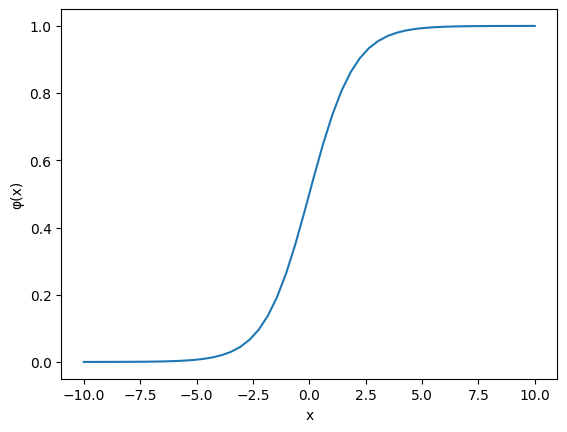

In [5]:
#@title
import numpy as np 
import matplotlib.pyplot as plt

def Sigmoid(x):
    '''Função de ativação'''
    return 1.0 / (1.0 + np.exp(-x))

x = np.linspace(-10, 10, 50)   
p = Sigmoid(x)
plt.xlabel("x") 
plt.ylabel("φ(x)")  
plt.plot(x, p) 
plt.show()

Quanto ao modo de atualizar os pesos, isso pode ser feito a cada nova entrada, ao que chamamos Descida Gradiente Estocástica (*Stochastic Gradient Descent*) ou simplesmente SGD, ou ao final do conjunto de testes, com a média dos pesos obtidos, ao que chamamos em Lote (*Batch*). Um itermediário dos dois modos pode ser feito dividindo o conjunto de treinamento em partes e atualizando os pesos ao final de cada parte. Também implementamos variações usando o erro quadrático, que não estavam em nossa referência principal. 

## Exemplo (camada única)

A seguir está um exemplo de treinamento de uma rede neural com um único nó e três entradas, nossos dados de treinamento serão: 

|Entradas|Saída|
|:---:|:--:|
 0 0 1|1|
 0 1 1|1|
 1 0 1|0|
 1 1 1|0|

In [ ]:
%%time
import numpy as np

def DeltaSGD(W, X, D):
    '''Taxa de aprendizado'''
    alpha = 0.9
    '''Numero de entradas'''
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        v = np.matmul(W, x)
        y = Sigmoid(v)
        e     = d - y
        delta = y * (1-y) * e
        dW = alpha*delta*x
        '''Atualiza pesos a cada nova entrada'''
        W[0][0] = W[0][0] + dW[0]
        W[0][1] = W[0][1] + dW[1]
        W[0][2] = W[0][2] + dW[2]
    '''Retorna novos pessos'''
    return W

def DeltaSGDSqr(W, X, D): # Variacao^2
    alpha = 0.9
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        v = np.matmul(W, x)
        y = Sigmoid(v)
        '''Erro ao quadrado'''
        e = (d - y) ** 2
        '''Adiciona 2* na derivada e troca "e" por (d - y)'''
        delta = 2 * y * (1-y) * (d - y)
        dW = alpha*delta*x
        W[0][0] = W[0][0] + dW[0]
        W[0][1] = W[0][1] + dW[1]
        W[0][2] = W[0][2] + dW[2]
    return W

def DeltaBatch(W, X, D):
    alpha = 0.9
    '''Zera ajustes dos pesos'''
    dWsum = np.zeros(3)
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        v = np.matmul(W, x)
        y = Sigmoid(v)
        e     = d - y
        delta = y*(1-y) * e
        dW = alpha * delta * x
        '''Acumula ajustes'''
        dWsum = dWsum + dW
    '''Ajusta ao final usando a média'''
    dWavg = dWsum / N
    W[0][0] = W[0][0] + dWavg[0]
    W[0][1] = W[0][1] + dWavg[1]
    W[0][2] = W[0][2] + dWavg[2]
    return W

def DeltaBatchSqr(W, X, D): # Variacao^2
    alpha = 0.9
    dWsum = np.zeros(3)
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        v = np.matmul(W, x)
        y = Sigmoid(v)
        '''Erro ao quadrado'''
        e = (d - y) ** 2
        '''Adiciona 2* na derivada e troca "e" por (d - y)'''
        delta = 2 * y * (1-y) * (d - y)
        dW = alpha * delta * x
        dWsum = dWsum + dW
    dWavg = dWsum / N
    W[0][0] = W[0][0] + dWavg[0]
    W[0][1] = W[0][1] + dWavg[1]
    W[0][2] = W[0][2] + dWavg[2]
    return W

def TestDelta():
    '''Entradas do conjunto de treinamento (4) com três componentes cada'''
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    '''Saídas do conjunto de treinamento'''
    D = np.array([[0], # 0
                  [0], # 1
                  [1], # 1
                  [1]])# 0
    '''Pesos iniciais aleatórios entre -1 e 1'''
    W = 2*np.random.random((1, 3)) - 1
    '''Realizao treinamento com 10000 epocas'''
    for _epoch in range(10000):
        '''Escolha um dos dois modos abaixo'''
        #W = DeltaSGD(W, X, D)
        #W = DeltaSGDSqr(W, X, D)
        #W = DeltaBatch(W, X, D)
        W = DeltaBatchSqr(W, X, D)
    '''Testa o reconhecimento'''
    N = 4
    for k in range(N):
        x = X[k,:].T
        v = np.matmul(W, x)
        y = Sigmoid(v)
        print(y)

if __name__ == '__main__':
    TestDelta()

[0.01454674]
[0.01180208]
[0.9903907]
[0.98814988]
CPU times: user 1.02 s, sys: 37.2 ms, total: 1.05 s
Wall time: 1.07 s


Para este problema, os dois modos não diferem muito em termos de precisão e tempo de treinamento. No entanto, observe no código a seguir que o treinamento com o método SGD aprende mais rápido, já que atualiza os pesos a cada nova entrada. Agora, experimente trocar a saída conforme a tabela a seguir execute novamente o código anterior novamente:

|Entradas|Saída|
|:---:|:--:|
 0 0 1|0|
 0 1 1|1|
 1 0 1|1|
 1 1 1|0|

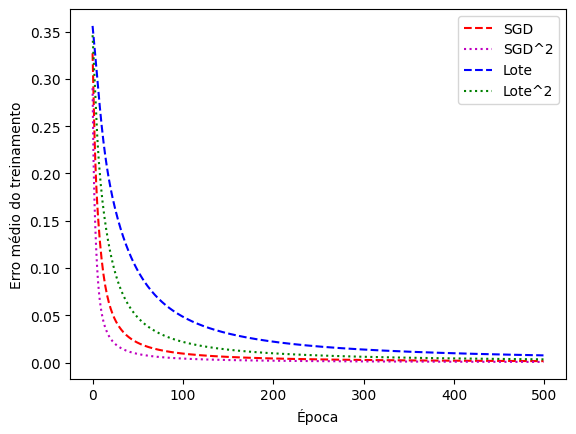

In [ ]:
import matplotlib.pyplot as plt
epochs = 500
'''Entradas do conjunto de treinamento (4) com três componentes cada'''
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
'''Saídas do conjunto de treinamento'''
D = np.array([[0],
              [0],
              [1],
              [1]])
'''Vetores para armazenar o erro quadrático médio'''
E1 = np.zeros(epochs)
E2 = np.zeros(epochs)
E3 = np.zeros(epochs)
E4 = np.zeros(epochs)
'''Inicializa os pesos iniciais com os mesmos valores'''
W1 = 2*np.random.random((1, 3)) - 1
W2 = np.array(W1)
W3 = np.array(W1)
W4 = np.array(W1)
'''Realiza o treinamento por *epochs* épocas'''
for epoch in range(epochs):
    W1 = DeltaSGD(W1, X, D)
    W2 = DeltaBatch(W2, X, D)
    W3 = DeltaBatchSqr(W3, X, D)
    W4 = DeltaSGDSqr(W4, X, D)
    '''Zera as variáveis de erro'''
    es1 = 0
    es2 = 0
    es3 = 0
    es4 = 0
    N   = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        '''Acumula erro [quadrático?] para SGD'''
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        es1 = es1 + (d - y1)**2
        '''Acumula erro quadrático para Lote'''
        v2 = np.matmul(W2, x)
        y2 = Sigmoid(v2)
        es2 = es2 + (d - y2)**2
        '''Acumula erro quadrático para Lote Quadratico'''
        v3 = np.matmul(W3, x)
        y3 = Sigmoid(v3)
        es3 = es3 + (d - y3)**2
        '''Acumula erro quadrático para SGD'''
        v4 = np.matmul(W4, x)
        y4 = Sigmoid(v4)
        es4 = es4 + (d - y4)**2
    '''Atualiza os erros médios'''
    E1[epoch] = es1/N
    E2[epoch] = es2/N
    E3[epoch] = es3/N
    E4[epoch] = es4/N
'''Plota os resultados'''    
SGD,   = plt.plot(E1, 'r--')
SGDSqr, = plt.plot(E4, 'm:')
Batch, = plt.plot(E2, 'b--')
BatchSqr, = plt.plot(E3, 'g:')
plt.xlabel("Época")
plt.ylabel("Erro médio do treinamento")
plt.legend([SGD, SGDSqr, Batch, BatchSqr], ['SGD', 'SGD^2', 'Lote', 'Lote^2'])
plt.show()

## Limitações das rede neurais de camada única

Após mudar o resultado da função anterior para {0,1,1,0} notamos que ela não é mais capaz de solucionar o problema, mesmo treinando a rede por um período mais longo. Por que isso acontece?

No problema original, se interpretarmos as variáveis de entrada como coordenadas X, Y e Z, conseguimos separar as saídas por uma linha reta que corta o eixo X. Já no problema modificado isso não é mais possível e esta é justamente a limitação das redes neurais de camada única. Elas resultam em um modelo que dividem linearmente os espaço dos dados de entrada. As redes multicamadas não apresentam esta limitação.

## Retropropagação (backpropagation)

As redes multicamadas demoraram 30 anos para aparecerem e isso está relacionado com a regra de aprendizado. A **regra delta** vista anteriormente não serve para elas, já que o erro é determinado somente para a camada de saída. O algoritmo **back propagation** resolve este problema, calculando o erro para as camadas ocultas e permitindo o treinamento. 

## Exemplo (multicamada)

Para solucionar o problema da função XOR, vamos construir uma rede multicamada com 3 nós de entrada, 4 nós na camada oculta e 1 nó na camada de saída:

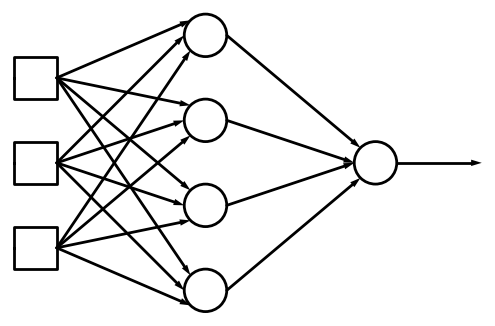

In [ ]:
#@title
%reload_ext autoreload
%autoreload 2
import schemdraw.dsp as dsp
with schemdraw.Drawing() as d:
    d.config(unit=2)

    d += (cin1 := dsp.Square().at((4,1)))
    d += (cin2 := dsp.Square().at((4,3)))
    d += (cin3 := dsp.Square().at((4,5)))

    d += (cm1 := dsp.Circle().at((8,0)))
    d += (cm2 := dsp.Circle().at((8,2)))
    d += (cm3 := dsp.Circle().at((8,4)))
    d += (cm4 := dsp.Circle().at((8,6)))

    d += (cout2 := dsp.Circle().at((12,3)))
    d += elm.Arrow().at(cout2.E)

    d += elm.Arrow().at(cin1.E).to(cm1.SW)
    d += elm.Arrow().at(cin1.E).to(cm2.SW)
    d += elm.Arrow().at(cin1.E).to(cm3.SW)
    d += elm.Arrow().at(cin1.E).to(cm4.SW)
    d += elm.Arrow().at(cin2.E).to(cm1.W)
    d += elm.Arrow().at(cin2.E).to(cm2.W)
    d += elm.Arrow().at(cin2.E).to(cm3.W)
    d += elm.Arrow().at(cin2.E).to(cm4.W)
    d += elm.Arrow().at(cin3.E).to(cm1.NW)
    d += elm.Arrow().at(cin3.E).to(cm2.NW)
    d += elm.Arrow().at(cin3.E).to(cm3.NW)
    d += elm.Arrow().at(cin3.E).to(cm4.NW)

    d += elm.Arrow().at(cm1.E).to(cout2.SW)
    d += elm.Arrow().at(cm2.E).to(cout2.W)
    d += elm.Arrow().at(cm3.E).to(cout2.W)
    d += elm.Arrow().at(cm4.E).to(cout2.NW)

Executando o código a seguir (que depende das funções anteriores) verificamos que a rede é capaz de reconhecer a função:

In [ ]:
%time
def BackpropXOR(W1, W2, X, D):
    '''Taxa de aprendizado'''
    alpha = 0.9
    '''Conjunto de treinamento'''
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        '''Aplica a função sigmoide em cada camada'''
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        '''Calcula erro e delta (derivada da função erro)'''
        e     = d - y
        delta = y*(1-y) * e
        '''Propaga erro e delta para camada anterior (agora vetores)'''
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        '''Atualiza pesos na primeira camada'''
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1  = W1 + dW1
        '''Atualiza pesos na segunda camada'''
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    '''Retorna os pesos'''
    return W1, W2

def BackpropXORSqr(W1, W2, X, D):
    '''Taxa de aprendizado'''
    alpha = 0.9
    '''Conjunto de treinamento'''
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        '''Aplica a função sigmoide em cada camada'''
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        '''Calcula erro e delta (derivada da função erro)'''
        e     = (d - y)**2
        delta = 2*(d-y)*y*(1-y)
        '''Propaga erro e delta para camada anterior (agora vetores)''' #TODO: convirmar se o 2* também não se aplica a este passo
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1*2
        '''Atualiza pesos na primeira camada'''
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1  = W1 + dW1
        '''Atualiza pesos na segunda camada'''
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    '''Retorna os pesos'''
    return W1, W2

def TestBackpropXOR():
    '''Entradas do conjunto de treinamento'''
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    '''Saídas do conjunto de treinamento'''
    D = np.array([[0],
                  [1],
                  [1],
                  [0]])
    '''Pesos iniciais aleatórios entre -1 e 1'''
    W1 = 2*np.random.random((4, 3)) - 1
    W2 = 2*np.random.random((1, 4)) - 1
    '''Realiza o treinamento por 10000 épocas'''
    for _epoch in range(10000):
        #W1, W2 = BackpropXOR(W1, W2, X, D)
        W1, W2 = BackpropXORSqr(W1, W2, X, D)
    '''Testa o reconhecimento'''
    N = 4
    for k in range(4):
        x  = X[k ,:].T       
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        print(y)

if __name__ == '__main__':
    TestBackpropXOR()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
[0.00362368]
[0.9925209]
[0.99038565]
[0.01025447]


## Momento

Existem várias formas de ajuste de peso disponíveis. Fórmulas avançadas de ajuste de peso podem dar maior estabilidade e velocidades mais rápidas no processo de treinamento da rede neural. A fórmula a seguir usa o **momento**, semelhante ao fenômeno da física, direcionando o ajuste do peso, em vez de produzir uma mudança imediata. 

In [ ]:
%time
def BackPropMmt(W1, W2, X, D):
    alpha = 0.9
    beta  = 0.9
    '''Momentos iniciais zerados'''
    mmt1 = np.zeros_like(W1)
    mmt2 = np.zeros_like(W2)
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        e     = d - y
        delta = y*(1-y) * e
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        dW1  = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        '''Calcula momentos e pondera atualizações por eles'''
        mmt1 = dW1 + beta * mmt1
        W1   = W1 + mmt1
        dW2  = alpha * delta * y1
        mmt2 = dW2 + beta*mmt2
        W2   = W2 + mmt2
    return W1, W2

def TestBackpropMmt():
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    D = np.array([[0],
                  [1],
                  [1],
                  [0]])
    W1 = 2*np.random.random((4, 3)) - 1
    W2 = 2*np.random.random((1, 4)) - 1
    for _epoch in range(10000):
        W1, W2 = BackPropMmt(W1, W2, X, D)
    N = 4
    for k in range(N):
        x  = X[k, :].T
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        print(y)

if __name__ == '__main__':
    TestBackpropMmt()


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
[0.00582577]
[0.99370122]
[0.99272976]
[0.01050859]


## Função de Custo e Regra de Aprendizagem

A função de custo de uma rede neural é usada para medir o seu erro e tem grande influência na sua regra de aprendizagem. Há dois tipos principais de funções de custo em redes neurais de aprendizado supervisionado. A primeira delas é a seguinte:

$J = \sum\limits_{i=1}^{M} \frac{1}{2} (d_i - y_i)^2$

onde $y_i$ é a saída do nó de saída, $d_i$ é a saída esperada do conjunto de treinamento e $M$ é o número de nós de saída. 


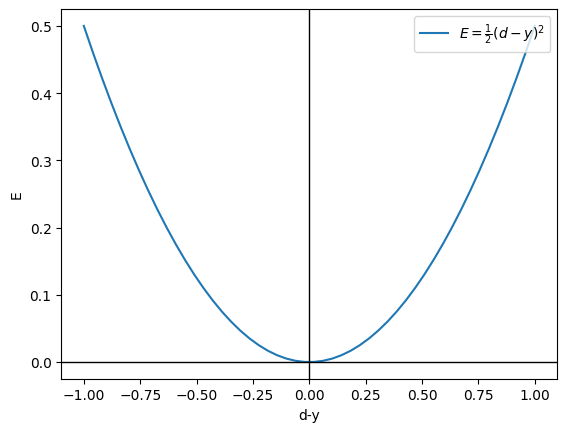

In [ ]:
#@title
def erro(x):
  return 1/2*(x**2)

x = np.linspace(-1, 1, 50)   
p = erro(x)
plt.xlabel("d-y") 
plt.ylabel("E")  
plt.plot(x, p, label=r'$E = \frac{1}{2} (d-y)^2$') 
plt.legend(loc='upper right')
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.show()

A segunda função de custo é chamada de entropia cruzada (*cross entropy*):

$J = \sum\limits_{i=1}^{M} \{-d_i ln(y_i) - (1-d_i)ln(1 - y_i)\}$

No forma contraída é dificil relacioná-la com o erro, então vamos separar a parte que está nos colchetes em duas equações:

$E = 
\left\{\begin{matrix}
- ln(y) & d  = 1\\ 
-ln(1-y) & d = 0
\end{matrix}\right.$

Devido à definição de um logaritmo, a saída y deve estar entre 0 e 1. Portanto, a função de custo de entropia cruzada geralmente se associa a sigmóide e funções de ativação *softmax* que veremos mais adiante.

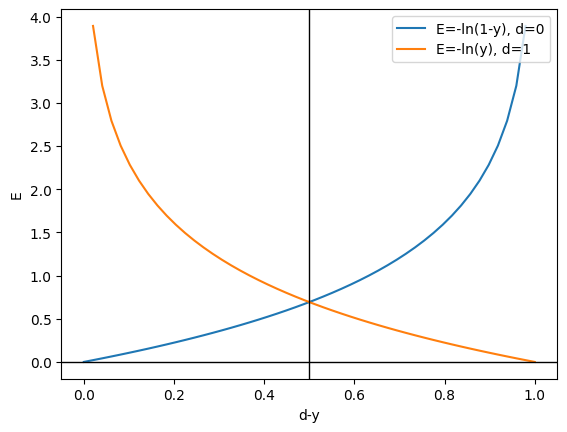

In [ ]:
#@title
def cross_entropy(x, d):
    if d == 1:
      return -np.log(x)
    else:
      return -np.log(1 - x)

np.seterr(divide = 'ignore') # ignore ln(0) error
x = np.linspace(0, 1, 50)   
d0 = cross_entropy(x, 0)
d1 = cross_entropy(x, 1)
plt.xlabel("d-y") 
plt.ylabel("E")  
plt.plot(x, d0, label='E=-ln(1-y), d=0') 
plt.plot(x, d1, label='E=-ln(y), d=1') 
plt.legend(loc='upper right')
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0.5, color='black', linewidth=1)
plt.show()

## Comparando...

Aqui comparamos diferentes implementações do algoritmo de treinamento com variações, notamos que algum convergem mais rápido para o modelo desejado. 

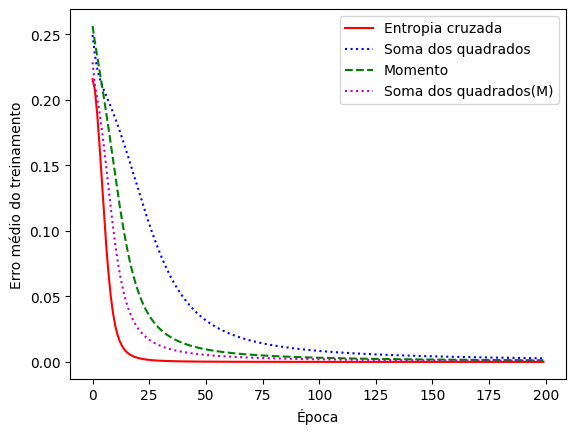

In [ ]:
epochs = 200 #TODO onde está o ln da entropia cruzada?

def BackpropCE(W1, W2, X, D):
    alpha = 0.9

    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        
        e     = d - y
        delta = e
        
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1  = W1 + dW1
               
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    
    return W1, W2

X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0],
              [0],
              [1],
              [1]])

E1 = np.zeros(epochs)
E2 = np.zeros(epochs)
E3 = np.zeros(epochs)
E4 = np.zeros(epochs)

W11 = 2*np.random.random((4, 3)) - 1
W12 = 2*np.random.random((1, 4)) - 1
W21 = np.array(W11)
W22 = np.array(W12)
W31 = np.array(W11)
W32 = np.array(W12)
W41 = np.array(W11)
W42 = np.array(W12)


for _epoch in range(epochs):
    W11, W12 = BackpropCE(W11, W12, X, D)
    W21, W22 = BackpropXOR(W21, W22, X, D)
    W31, W32 = BackPropMmt(W31, W32, X, D)
    W41, W42 = BackpropXORSqr(W41, W42, X, D)

    es1 = 0
    es2 = 0 
    es3 = 0 
    es4 = 0 
    N   = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]

        v1  = np.matmul(W11, x)
        y1  = Sigmoid(v1)
        v   = np.matmul(W12, y1)
        y   = Sigmoid(v)
        es1 = es1 + (d - y)**2
        
        v1  = np.matmul(W21, x)
        y1  = Sigmoid(v1)
        v   = np.matmul(W22, y1)
        y   = Sigmoid(v)
        es2 = es2 + (d - y)**2
        
        v1  = np.matmul(W31, x)
        y1  = Sigmoid(v1)
        v   = np.matmul(W32, y1)
        y   = Sigmoid(v)
        es3 = es3 + (d - y)**2

        v1  = np.matmul(W41, x)
        y1  = Sigmoid(v1)
        v   = np.matmul(W42, y1)
        y   = Sigmoid(v)
        es4 = es4 + (d - y)**2

    E1[_epoch] = es1 / N
    E2[_epoch] = es2 / N
    E3[_epoch] = es3 / N
    E4[_epoch] = es4 / N
    

CE,   = plt.plot(E1, 'r')
SSE,  = plt.plot(E2, 'b:')
MM,   = plt.plot(E3, 'g--')
SSE2, = plt.plot(E4, 'm:')
plt.xlabel('Época')
plt.ylabel('Erro médio do treinamento')
plt.legend([CE, SSE, MM, SSE2], ["Entropia cruzada", "Soma dos quadrados", "Momento", "Soma dos quadrados(M)"])
plt.show()

## Redes Neurais em problemas de classificação

Já [vimos anteriormente](#tipos) que as redes neurais podem ser usada para problemas de classificação e de regressão, mas os últimos podem ser resolvidos com modelos mais simples. 

Na aplicação da rede neural à classificação, a camada de saída é
geralmente estruturada de forma diferente, dependendo de quantos grupos os dados devem ser divididos. A seleção do número de nós e função de ativação adequada para a classificação em dois grupos é diferente ao usar mais grupos. A camada de entrada é, em geral, uniforme, contendo um neurônio para cada elemento da entrada. 

### Classificação binária

Na classificação binária - a que tem mais aplicações - procura-se dividir as entradas em duas categorias, tais como e-mails regulares e spam, acesso comuns ou invasões, etc. Nela temos um único neurônio de saída com função de ativação sigmoide, variando entre 0 e 1, que nos dá a probabilidade de uma entrada pertencer a uma classe ou outra. 


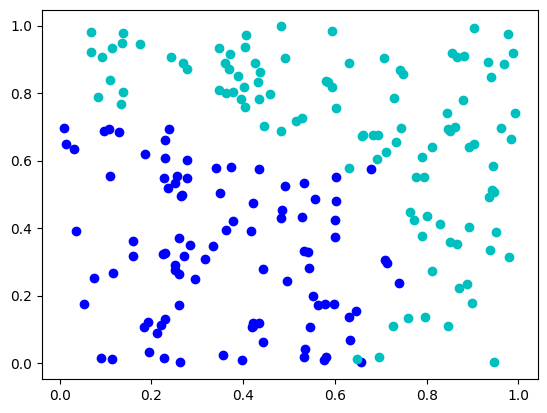

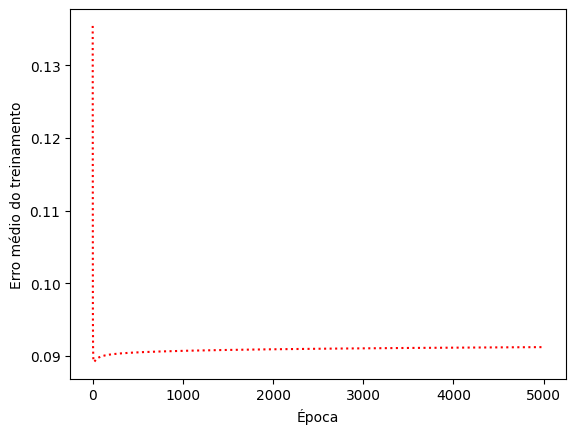

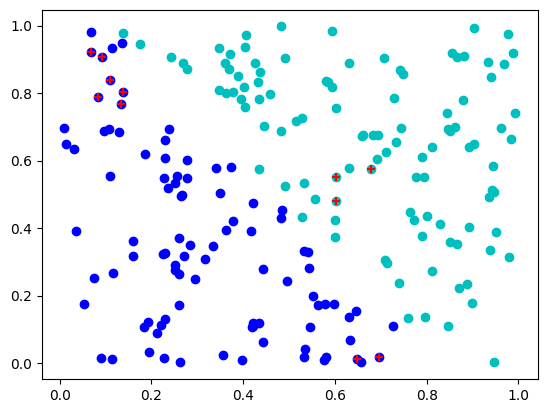

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200
epochs = 5000

def cond(value):
  var = np.random.rand()*0.1 - 0.05
  '''Corner Arc'''
  return math.dist([0.25, 0.25], value) > 0.5 + var
  '''Central Circle'''
  # return math.dist([0.5, 0.5], value) > 0.25 + var

def BackpropCE2(W1, W2, X, D):
    alpha = 0.9
    for k in range(N):
        xl = X[k, :].T
        d = D[k]
        v1 = np.matmul(W1, xl)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y2  = Sigmoid(v)
        e     = d - y2
        delta = e
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        dW1 = (alpha*delta1).reshape(4, 1) * xl.reshape(1, 2)
        W1  = W1 + dW1
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    return W1, W2

x = np.random.rand(N)
y = np.random.rand(N)
X = np.zeros([N, 2])
D = np.zeros([N, 1])

for i in range(N):
  X[i] = [x[i], y[i]]
  if cond(X[i]):
    D[i] = [1]
    plt.scatter(x[i], y[i], color='c')
  else:
    D[i] = [0]
    plt.scatter(x[i], y[i], color='b')

plt.show()

E1 = np.zeros(epochs)

W11 = 2*np.random.random((4, 2)) - 1
W12 = 2*np.random.random((1, 4)) - 1

for _epoch in range(epochs):
    W11, W12 = BackpropCE2(W11, W12, X, D)
    es1 = 0
    for k in range(N):
        xl = X[k, :].T
        d = D[k]
        v1  = np.matmul(W11, xl)
        y1  = Sigmoid(v1)
        v   = np.matmul(W12, y1)
        y2   = Sigmoid(v)
        es1 = es1 + (d - y2)**2
    E1[_epoch] = es1 / N
    
CE,   = plt.plot(E1, 'r:')
plt.xlabel('Época')
plt.ylabel('Erro médio do treinamento')
plt.show()

for k in range(N):
    xl = X[k, :].T
    d = D[k]
    v1  = np.matmul(W11, xl)
    y1  = Sigmoid(v1)
    v   = np.matmul(W12, y1)
    yy   = Sigmoid(v)
    if yy>0.5:
      plt.scatter(x[k], y[k], color='c')
    else:
      plt.scatter(x[k], y[k], color='b')
    if (D[k]-yy)**2 > 0.5:
      plt.scatter(x[k], y[k], color='r', marker='+')

# plt.show()


### Classificação múltipla

Já na classificação múltipla, costuma-se usar um neurônio na camada de saída para cada classe que se deseja classificar. Neste caso, usa-se uma função de ativação diferente, chamada **Softmax**, que leva em conta todos os neurônios de saída para seu cálculo. Nesta modalidade 

# Referências

- [Phil Kim, Deep Learning for Beginners](https://github.com/philbooks/Deep-Learning-for-Beginners)